In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.pyplot import cm
import datetime
import math
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [25]:

#Constants
months = np.linspace(1, 12, 12)
months = np.linspace(1, 12, 12)
monthslabel = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
intervals = np.round(np.linspace(1970, 2020, 11), 0)
interval = intervals[1] - intervals[0]

### Import Scenario Runs

##### Import spatial 

In [3]:
Gridcells = np.loadtxt('FIESTA_spatial_yalijux_cahabon_frst.csv', delimiter=',')
Scale_truearea = np.loadtxt('CellSizeFactor_Mestela.csv')

##### Import meteo full time series

In [4]:
#Meteo_in = np.loadtxt('INSIVUMEH_Meteo.csv', delimiter=',')
#Meteo = Meteo_in[3256:-1, :]

###### Import Meteo, only year-month avgs

In [5]:
#Meteo = np.loadtxt('Meteo_only_temp_var.csv', delimiter=',')
#Meteo = np.loadtxt('Meteo_yearmonthavgs.csv', delimiter=',')
Meteo = np.loadtxt('INSIVUMEH_Coban_1970_synth.csv', delimiter=',')


##### Full time series, all grid cells, unscaled, vary land use scenarios

In [6]:
# Fog_Evap_Budg_Scn5 = np.load('Fog_Evap_Budg_Scn5.npy')
# Fog_Evap_Budg_Scn4 = np.load('Fog_Evap_Budg_Scn4.npy')
# Fog_Evap_Budg_Scn3 = np.load('Fog_Evap_Budg_Scn3.npy')
# Fog_Evap_Budg_Scn1 = np.load('Fog_Evap_Budg_Scn1.npy')

# fog_valScn5 = np.load('fog_valScn5.npy')
# fog_valScn4 = np.load('fog_valScn4.npy')
# fog_valScn3 = np.load('fog_valScn3.npy')
# fog_valScn2 = np.load('fog_valScn2.npy')
# fog_valScn1 = np.load('fog_valScn1.npy')

# LCL_valScn5 = np.load('LCL_valScn5.npy')
# LCL_valScn4 = np.load('LCL_valScn4.npy')
# LCL_valScn3 = np.load('LCL_valScn3.npy')
# LCL_valScn2 = np.load('LCL_valScn2.npy')
# LCL_valScn1 = np.load('LCL_valScn1.npy')


##### Full time series, all grid cells, unscaled, fix LWC

In [15]:
# Fog_Evap_Budg_Scn4 = np.load('Fog_Evap_Budg_Scn4LWC.npy')
# Fog_Evap_Budg_Scn3 = np.load('Fog_Evap_Budg_Scn3LWC.npy')
# Fog_Evap_Budg_Scn2 = np.load('Fog_Evap_Budg_Scn2LCW.npy')
# Fog_Evap_Budg_Scn1 = np.load('Fog_Evap_Budg_Scn1.npy')

##### Year-month avg, all grid cells, unscaled

In [8]:
Fog_Evap_Budg_Scn2 = np.load('Fog_Evap_Budg_70.npy')


### Scale total by gridcells 

In [9]:
np.shape(Scale_truearea)
Scale_truearea = np.reshape(Scale_truearea, (len(Scale_truearea), 1))
fogdepscaledtrue = Scale_truearea * Fog_Evap_Budg_Scn2[:, :, 0]

(18628,)

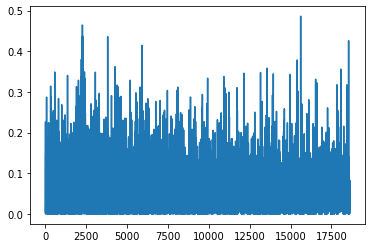

In [10]:
np.shape(fogdepscaledtrue)
total_mestela = np.sum(fogdepscaledtrue, axis=0) / np.sum(Scale_truearea)
plt.plot(total_mestela)
np.shape(total_mestela)


In [11]:
# plt.plot(fog_valScn5[:,:, 0])
# plt.plot(fog_valScn5[:,:, 1])
# plt.plot(fog_valScn5[:,:, 2])
# plt.plot(fog_valScn5[:,:, 3])

In [12]:
#plt.plot(LCL_valScn5[1,:, 0], Meteo[:,6])
#plt.plot(LCL_valScn5[:,:, 1])
#plt.plot(LCL_valScn5[:,:, 2])
#plt.plot(LCL_valScn5[:,:, 3])

### Topography properties sensitivity plots

In [13]:
#Constants for sensitivity analysis --> 
#ForestCover = Scn2 
#Slope = 15
#Aspect = 292.5
#Elev = 2050

np.argmax(Fog_Evap_Budg_Scn2)



42220085

In [31]:
#Vary ForestFrac:
#Plot all timesteps and 4 scenarios for cell 439
cell = 435
print(Gridcells[cell, :])
xticks = [0, .25, .50, .75]
FogDepVegScns = np.zeros((len(Fog_Evap_Budg_Scn2[cell, :, 0]), 4))
FogDepVegScns[:, 0] = Fog_Evap_Budg_Scn1[cell, :, 0]
FogDepVegScns[:, 1] = Fog_Evap_Budg_Scn3[cell, :, 0]
FogDepVegScns[:, 2] = Fog_Evap_Budg_Scn2[cell, :, 0]
FogDepVegScns[:, 3] = Fog_Evap_Budg_Scn4[cell, :, 0]
xs = np.ones((len(Fog_Evap_Budg_Scn2[cell, :, 0]), 4))
plt.figure(figsize=(6, 6))
for i in range(len(Fog_Evap_Budg_Scn2[cell, :, 0])):
    xs[i, 0] = np.random.normal(0, .025)
    xs[i, 1] = np.random.normal(0.25, .025)
    xs[i, 2] = np.random.normal(0.5, .025)
    xs[i, 3] = np.random.normal(0.75, .025)
plt.plot(xs, FogDepVegScns, '.', color='gray', markersize = 1)
plt.plot(.00, FogDepVegScns[:, 0][np.logical_and(FogDepVegScns[:, 0] != 0, ~np.isnan(FogDepVegScns[:, 0]))].mean(), '.', color='red', markersize=10)
plt.plot(.25, FogDepVegScns[:, 1][np.logical_and(FogDepVegScns[:, 1] != 0, ~np.isnan(FogDepVegScns[:, 1]))].mean(), '.', color='red', markersize=10)
plt.plot(.50, FogDepVegScns[:, 2][np.logical_and(FogDepVegScns[:, 2] != 0, ~np.isnan(FogDepVegScns[:, 2]))].mean(), '.', color='red', markersize=10)
plt.plot(.75, FogDepVegScns[:, 3][np.logical_and(FogDepVegScns[:, 3] != 0, ~np.isnan(FogDepVegScns[:, 3]))].mean(), '.', color='red', markersize=10)
plt.xlabel('Fracción de cobertura forestal')
plt.ylabel('Intercepción de niebla [mm/día]')
#xtick_labels = ['Deforestado', '% Deforestado', 'Label 3', 'Label 4']
#plt.xticks(range(len(xtick_labels)), xtick_labels)
plt.xticks(xticks)
plt.ylim(0,10)
#plt.yscale('log')

[2.05000000e+03 2.92500000e+02 1.50000000e+01 1.00000000e+04
 1.03527618e+04 5.00000000e-01 5.00000000e-01 0.00000000e+00
 0.00000000e+00]


ValueError: could not broadcast input array from shape (8796,) into shape (18628,)

Text(0, 0.5, 'Intercepción de niebla [mm/día]')

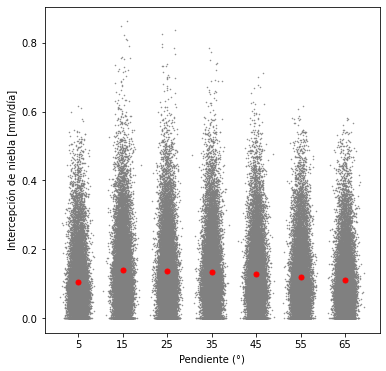

In [17]:
#Vary Slope
slopes = np.linspace(5, 65, 7)
spread = (slopes[1] - slopes[0]) / 10
#Plot all timesteps and 1 scenario for all slopes: 434 to 440
plt.figure(figsize=(6, 6))
FogDepSlopeScns = Fog_Evap_Budg_Scn2[433:440, :, 0]
xsSlope = np.ones((7, (len(Fog_Evap_Budg_Scn2[439, :, 0]))))
for i in range(len(slopes)):
    for j in range(len(Fog_Evap_Budg_Scn2[439, :, 0])):
        xsSlope[i, j] = np.random.normal(slopes[i], spread) 
plt.plot(xsSlope, FogDepSlopeScns, '.', color='gray', markersize = 1)
for i in range(len(slopes)):
    plt.plot(slopes[i], FogDepSlopeScns[i, :][np.logical_and(FogDepSlopeScns[i, :] != 0, ~np.isnan(FogDepSlopeScns[i, :]))].mean(), '.', color='red', markersize=10)
plt.xticks(slopes)
plt.xlabel('Pendiente (\u00b0)')
plt.ylabel('Intercepción de niebla [mm/día]')
#plt.yscale('log')
#plt.ylim(0,10)


(0.0, 10.0)

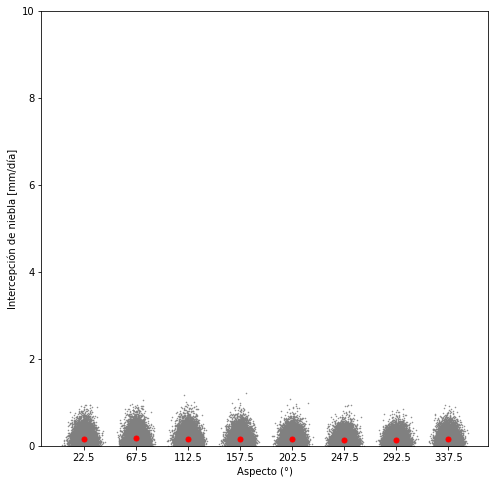

In [18]:
#Vary Aspect
aspects = np.linspace(22.5, 337.5, 8)
spread = (aspects[1] - aspects[0]) / 10
#Plot all timesteps and 1 scenario for all slopes: 434 to 440
FogDepAspectScns = np.zeros((8, (len(Fog_Evap_Budg_Scn2[439, :, 0]))))
xsAspect = np.ones((8, (len(Fog_Evap_Budg_Scn2[439, :, 0]))))
plt.figure(figsize=(8, 8))
for i in range(0, len(aspects)):
    FogDepAspectScns[i,:] = Fog_Evap_Budg_Scn2[393+i*len(slopes), :, 0]
    #print(Gridcells[393+i*len(slopes), :])
    for j in range(len(Fog_Evap_Budg_Scn2[439, :, 0])):
        xsAspect[i, j] = np.random.normal(aspects[i], spread) 
plt.plot(xsAspect, FogDepAspectScns, '.', color='gray', markersize = 1)
for i in range(0, len(aspects)):
    plt.plot(aspects[i], FogDepAspectScns[i, :][np.logical_and(FogDepAspectScns[i, :] != 0, ~np.isnan(FogDepAspectScns[i, :]))].mean(), '.', color='red', markersize=10)
plt.xticks(aspects)
plt.xlabel('Aspecto (\u00b0)')
plt.ylabel('Intercepción de niebla [mm/día]')
#plt.yscale('log')
plt.ylim(0,10)

Text(0, 0.5, 'Intercepción de niebla [mm/día]')

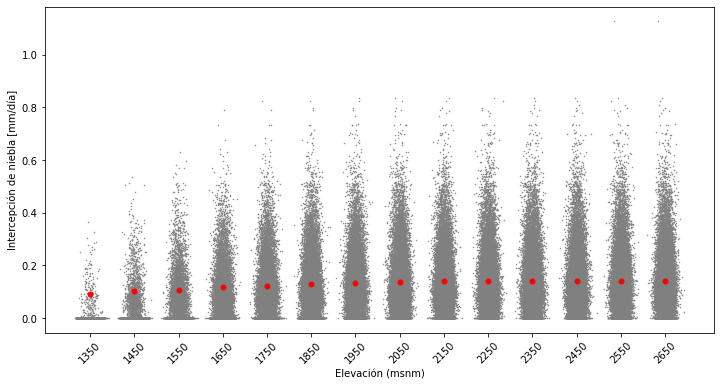

In [19]:
#Vary Elevation
plt.figure(figsize=(12, 6))
elevs = np.linspace(1350, 2650, 14)
spread = (elevs[1] - elevs[0]) / 10
FogDepElevScns = np.zeros((len(elevs), (len(Fog_Evap_Budg_Scn2[439, :, 0]))))
xsElev = np.ones((len(elevs), (len(Fog_Evap_Budg_Scn2[439, :, 0]))))
for i in range(0, len(elevs)):
    FogDepElevScns[i,:] = Fog_Evap_Budg_Scn2[43+i*len(slopes)*len(aspects), :, 0]
    #print(Gridcells[43+i*len(slopes)*len(aspects), :])
    for j in range(len(Fog_Evap_Budg_Scn2[439, :, 0])):
        xsElev[i, j] = np.random.normal(elevs[i], spread) 
plt.plot(xsElev, FogDepElevScns, '.', color='gray', markersize = 1)
for i in range(0, len(elevs)):
    plt.plot(elevs[i], FogDepElevScns[i, :][np.logical_and(FogDepElevScns[i, :] != 0, ~np.isnan(FogDepElevScns[i, :]))].mean(), '.', color='red', markersize=10)
plt.xticks(elevs, rotation=45)
plt.xlabel('Elevación (msnm)')
plt.ylabel('Intercepción de niebla [mm/día]')
#plt.yscale('log')
#plt.ylim(0,10)

In [20]:
np.linspace(1350, 2650, 14)

array([1350., 1450., 1550., 1650., 1750., 1850., 1950., 2050., 2150.,
       2250., 2350., 2450., 2550., 2650.])

### Timeseries intervals boxplots

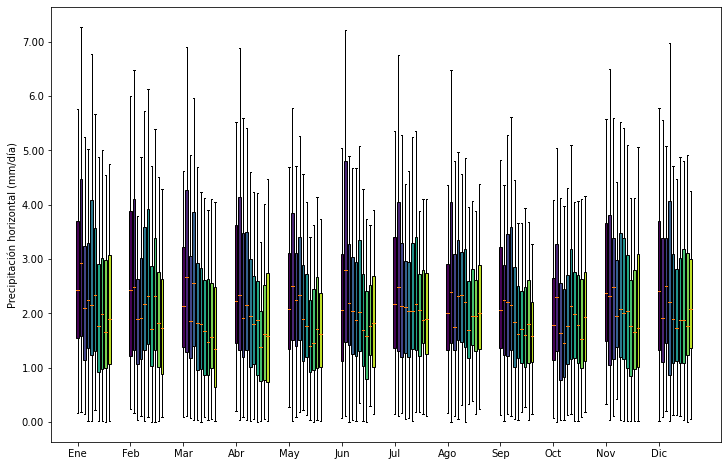

In [30]:
#months = [1, 2, 3, 4]
#monthslabel = ['Ene', 'Feb', 'Mar', 'Abr']

color_n = len(intervals)
colorvals = np.linspace(0, 1, color_n)
cmap = plt.cm.get_cmap('viridis') #viridis
colors = cmap(colorvals)

#FogDep_timeseries = Fog_Evap_Budg_Scn5[cell, :, 0]
FogDep_timeseries = total_mestela
FogDep_timeseries.reshape(len(FogDep_timeseries), 1)
plt.figure(figsize=(12, 8))
for i in range(len(intervals)):
    for j in range(len(months)):
        indices = np.where((Meteo[:,0] > intervals[i]) & (Meteo[:,0] < intervals[i]+interval) & (Meteo[:,1] == months[j]) & ~np.isnan(FogDep_timeseries) & (FogDep_timeseries[:] > 0))
        x = np.ones(len(indices)) * months[j] + i/10
        yplot = FogDep_timeseries[indices]
        plt.boxplot([yplot], positions=[months[j] + i/15], whis=1, showfliers=0, widths=0.05, patch_artist = True, boxprops = dict(facecolor = colors[i])); #meanprops={'marker':'.', 'markerfacecolor': 'red', 'markeredgecolor': 'red'}
    
plt.xticks(months, monthslabel);
plt.yticks([0, 0.025, .05, .075, .1, .125, .150, .175], ['0.00', '1.00', '2.00', '3.00', '4.00', '5.00', '6.0', '7.00']);

#plt.legend()
#plt.ylim([0, .5])

plt.ylabel('Precipitación horizontal (mm/día)');


### Temperature 

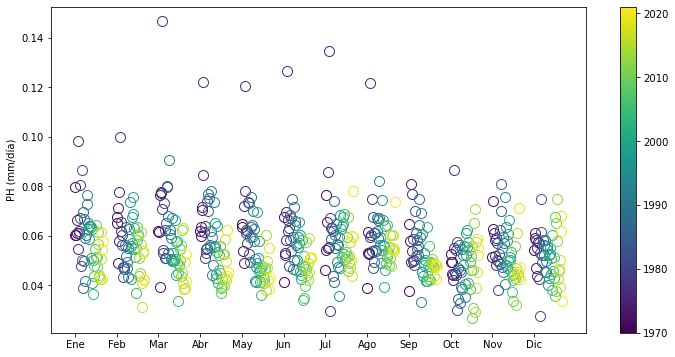

In [29]:
plt.figure(figsize=(12, 6))

years = np.linspace(int(Meteo[0,0]), int(Meteo[-1,0]), int(Meteo[-1,0] - Meteo[0,0] +1 ))

color_n = len(years)
colorvals = np.linspace(0, 1, color_n)
cmap = plt.cm.get_cmap('viridis') #viridis
colors = cmap(colorvals)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([int(Meteo[0,0]), int(Meteo[-1,0]+1)])

FogDep_timeseries = total_mestela
FogDep_timeseries.reshape(len(FogDep_timeseries), 1)
for i in range(len(years)):
    for j in range(len(months)):
        indices = np.where((Meteo[:,0] == years[i]) & (Meteo[:,1] == months[j]) & ~np.isnan(FogDep_timeseries))
        Fog = np.sum(FogDep_timeseries[indices])
        #Temp = np.sum(Meteo[indices, 5]) / np.shape(indices)[1]
        #Prcp = np.sum(Meteo[indices, 17])
        PhPv = Fog / np.shape(indices)[1]
        plt.plot(months[j]+i/75, PhPv, '.', color=colors[i], marker='o', markersize=10, markerfacecolor='none', linestyle='None');
cbar = plt.colorbar(sm)
plt.ylabel('PH (mm/día)')
#plt.ylabel('Promedio Mensual de Temperatura Mínima Diaria (\u00b0C)')
plt.xticks(months, monthslabel);
#plt.ylim(14, 24)

C:\Users\linna\AppData\Local\Temp\ipykernel_19148\2540769247.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(months[j]+i/75, PhPv, '.', color=colors[i], marker='o', markersize=10, markerfacecolor='none', linestyle='None')


([<matplotlib.axis.XTick at 0x21c860022e0>,
 [Text(1.0, 0, 'Ene'),
  Text(2.0, 0, 'Feb'),
  Text(3.0, 0, 'Mar'),
  Text(4.0, 0, 'Abr'),
  Text(5.0, 0, 'May'),
  Text(6.0, 0, 'Jun'),
  Text(7.0, 0, 'Jul'),
  Text(8.0, 0, 'Ago'),
  Text(9.0, 0, 'Sep'),
  Text(10.0, 0, 'Oct'),
  Text(11.0, 0, 'Nov'),
  Text(12.0, 0, 'Dic')])

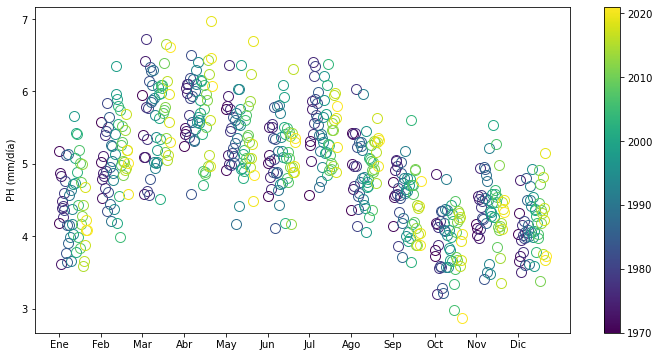

In [142]:
plt.figure(figsize=(12, 6))

years = np.linspace(int(Meteo[0,0]), int(Meteo[-1,0]), int(Meteo[-1,0] - Meteo[0,0] +1 ))

color_n = len(years)
colorvals = np.linspace(0, 1, color_n)
cmap = plt.cm.get_cmap('viridis') #viridis
colors = cmap(colorvals)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([int(Meteo[0,0]), int(Meteo[-1,0]+1)])

#FogDep_timeseries = total_mestela
#FogDep_timeseries.reshape(len(FogDep_timeseries), 1)
for i in range(len(years)):
    for j in range(len(months)):
        indices = np.where((Meteo[:,0] == years[i]) & (Meteo[:,1] == months[j])) #& ~np.isnan(FogDep_timeseries))
        #Fog = np.sum(FogDep_timeseries[indices])
        Temp = np.sum(Meteo[indices, 14]) / np.shape(indices)[1]
        #Prcp = np.sum(Meteo[indices, 17])
        PhPv = Temp
        plt.plot(months[j]+i/75, PhPv, '.', color=colors[i], marker='o', markersize=10, markerfacecolor='none', linestyle='None')
cbar = plt.colorbar(sm)
plt.ylabel('PH (mm/día)')
#plt.ylabel('Promedio Mensual de Temperatura Mínima Diaria (\u00b0C)')
plt.xticks(months, monthslabel)
#plt.ylim(14, 24)

#### SPI

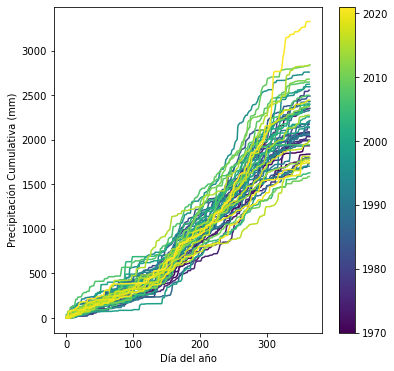

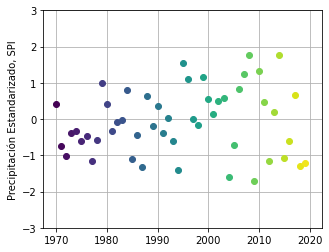

In [148]:
plt.figure(figsize=(6, 6))
year_tots_precip = np.zeros(int(Meteo[-1,0]+1) - int(Meteo[0, 0]))
for year in range(int(Meteo[0, 0]), int(Meteo[-1,0]+1)):
    i = year - int(Meteo[0, 0])
    cumprecip = np.cumsum(Meteo[:,17][Meteo[:, 0] == year])
    year_tots_precip[i] = cumprecip[-1]
    plt.plot(cumprecip, color=colors[i])

plt.xlabel('Día del año')
plt.ylabel('Precipitación Cumulativa (mm)')
cbar = plt.colorbar(sm)

SPI = (year_tots_precip - np.mean(year_tots_precip)) / np.std(year_tots_precip)
plt.figure(figsize=(5, 4))
plt.ylim(-3,3)
plt.grid()
plt.ylabel('Precipitación Estandarizado, SPI')
for i in range(len(SPI)):
    plt.plot(i+Meteo[0,0], SPI[i], 'o', color = colors[i])



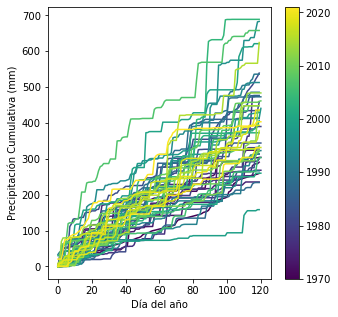

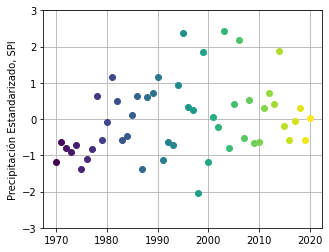

In [146]:
plt.figure(figsize=(5, 5))
year_tots_precip = np.zeros(int(Meteo[-1,0]+1) - int(Meteo[0, 0]))
for year in range(int(Meteo[0, 0]), int(Meteo[-1,0]+1)):
    i = year - int(Meteo[0, 0])
    mask = np.bitwise_and(Meteo[:, 0] == year,  Meteo[:, 1] < 5) #np.bitwise_or(Meteo[:, 1] == 12,)
    cumprecip = np.cumsum(Meteo[:,17][mask])
    year_tots_precip[i] = cumprecip[-1]
    #y = np.concatenate(np.linspace(335, 365, 31), np.linspace(0, 120, 121))
    plt.plot( cumprecip, color=colors[i])

plt.xlabel('Día del año')
plt.ylabel('Precipitación Cumulativa (mm)')
cbar = plt.colorbar(sm)

SPI = (year_tots_precip - np.mean(year_tots_precip)) / np.std(year_tots_precip)
plt.figure(figsize=(5, 4))
plt.ylim(-3,3)
plt.grid()
plt.ylabel('Precipitación Estandarizado, SPI')
for i in range(len(SPI)):
    plt.plot(i+Meteo[0,0], SPI[i], 'o', color = colors[i])


### RH 

C:\Users\linna\AppData\Local\Temp\ipykernel_3388\3563551686.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(months[j]+i/75, PhPv, '.', color=colors[i], marker='o', markersize=10, markerfacecolor='none', linestyle='None');
C:\Users\linna\AppData\Local\Temp\ipykernel_3388\3563551686.py:35: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(months[j], PhPv, '.', label = years[i], color=colors[i], marker='o', markersize=10, markerfacecolor='none', linestyle='None');
C:\Users\linna\AppData\Local\Temp\ipykernel_3388\3563551686.py:25: RuntimeWarning: invalid value encountered in double_scalars
  Temp = np.sum(Meteo[indices, 14]) / np.shape(indices)[1]


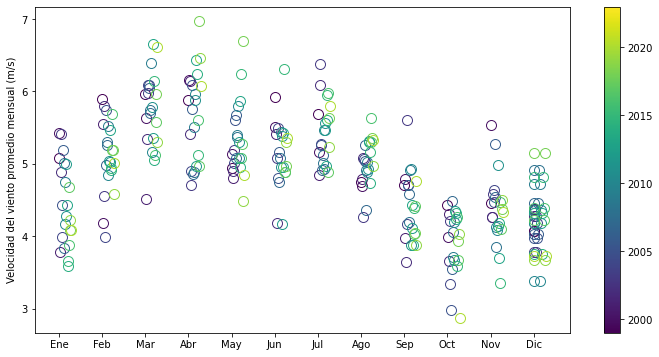

In [23]:
plt.figure(figsize=(12, 6))
years = np.linspace(1999, 2023, 2023-1998)
#color_n = len(years)


#intervals = np.round(np.linspace(1999, 2023, 7), 0)
#interval = intervals[1] - intervals[0]

#color_n = len(intervals)
color_n = len(years)
colorvals = np.linspace(0, 1, color_n)
cmap = plt.cm.get_cmap('viridis') #viridis
colors = cmap(colorvals)

#FogDep_timeseries = np.sum(Fog_Evap_Budg_Scn2[:, :, 0], axis=0) / len(Fog_Evap_Budg_Scn2)
FogDep_timeseries = total_mestela
FogDep_timeseries.reshape(len(FogDep_timeseries), 1)
#for i in range(len(intervals)):
for i in range(len(years)):
    #print(years[i])
    for j in range(len(months)):
        indices = np.where((Meteo[:,0] == years[i]) & (Meteo[:,1] == months[j]) & ~np.isnan(FogDep_timeseries)) #& (FogDep_timeseries[:] > .1))
        #indices = np.where((Meteo[:,0] > intervals[i]) & (Meteo[:,0] < (intervals[i]+interval)) & (Meteo[:,1] == months[j]) & ~np.isnan(FogDep_timeseries)) #& (FogDep_timeseries[:] > .1))
        Fog = np.sum(FogDep_timeseries[indices])
        Temp = np.sum(Meteo[indices, 14]) / np.shape(indices)[1]
        Prcp = np.sum(Meteo[indices, 17])
        PhPv = Temp
        #print(months[j])
        #print(Temp)
        #PhPv = Fog / np.shape(indices)[1]
        #print()
        if np.shape(indices)[1] > 25:
            plt.plot(months[j]+i/75, PhPv, '.', color=colors[i], marker='o', markersize=10, markerfacecolor='none', linestyle='None');
    #plt.plot(months[j], PhPv, '.', label = intervals[i], color=colors[i], marker='o', markersize=12, markerfacecolor='none', linestyle='None')
    plt.plot(months[j], PhPv, '.', label = years[i], color=colors[i], marker='o', markersize=10, markerfacecolor='none', linestyle='None');

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([1999, 2023])
cbar = plt.colorbar(sm)
#plt.legend()
plt.ylabel('Velocidad del viento promedio mensual (m/s)');
plt.xticks(months, monthslabel);
#plt.ylim(14, 24)

In [143]:
np.linspace(1990, 2023, 2023-1989)

array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2022., 2023.])

In [137]:
#FogDep_timeseries = np.sum(Fog_Evap_Budg_Scn2[:, :, 0], axis=0)
#np.shape(FogDep_timeseries)
#indices = [5, 6, 7]
indices = [2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871,
       2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882,
       2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 3226, 3227,
       3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238,
       3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249,
       3250, 3251, 3252, 3253, 3254, 3255, 3256, 3592, 3593, 3594, 3595,
       3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606,
       3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617,
       3618, 3619, 3620, 3621, 3622]
FogDep_timeseries[indices]

array([ 257.29517832,  190.58902098,  383.65015593, 1993.55498047,
        571.76706294,  362.05683178,   26.20599038,  529.12976764,
        656.3288404 ,  754.50852287,  434.39098301,  767.23816308,
        651.17176917,  565.78514701,  778.12848922,  353.99289502,
        326.19656481,  992.59145236, 1033.63200667,  524.73440682,
        722.74739053,  502.52653055,  285.88353147,  142.94176574,
        560.27810203, 1144.91730366, 1254.0375493 ,    0.        ,
         12.37581148, 1460.0684364 ,  778.52935789,  855.07952779,
        505.40830491,  469.89707769,  958.85671951,  564.40508548,
        452.51963772,  610.43779198,  497.50762156,  285.88353147,
        422.12228566,  116.42999009,    0.        ,   47.64725525,
        534.63505601, 1450.41654169,  674.40882652, 1056.96383783,
        563.9009674 ,  222.23450241,  380.9734327 ,  117.92695673,
       1387.65387276, 1628.53787137,    0.        ,    0.        ,
        511.12101419,   73.72437101,  247.51622963,  111.38230

In [135]:
FogDep_timeseries[indices]

array([], dtype=float64)

In [83]:
np.where((Meteo[:,0] > intervals[i]) & (Meteo[:,0] < intervals[i]+interval) & (Meteo[:,1] == months[j]) & ~np.isnan(FogDep_timeseries))


(array([], dtype=int64),)

### Output for QGIS

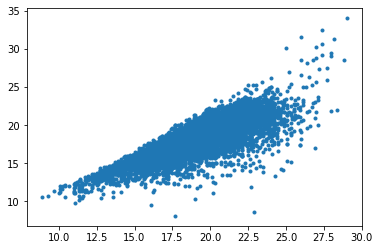

In [67]:
def Saturated_vapur_press(Tmp, RH):
    # Dewpoint
    # Inputs: 
    #       - Tmp = tamperature (C)
    #       - RH = relative humidity (%)
    # Outputs: 
    #       - Es = saturated vapour pressure (mb)
    #       - E  = vapour pressure (mb) 
    Es = np.exp(26.66082-0.0091379024*(Tmp + 273.15)-(6106.396/(Tmp+273.15))) #Saturated Vapour Pressure (mb)
    E = (RH/100)*Es #Vapour Pressure (mb)
    # Output units = mb
    return E

Tmp = Meteo[:,6]
RH = Meteo[:, 7]#np.linspace(89, 81, len(Meteo[:,6]))
#RH = np.linspace(89, 81, len(Meteo[:,6]))

E = Saturated_vapur_press(Tmp, RH)
plt.plot(Tmp, E, '.')

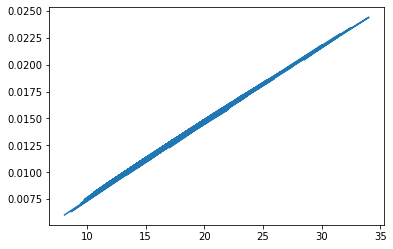

In [18]:
def Air_density(MSLP, Tmp, E):
    # Air Density 
    # Inputs: 
    #      - MSLP = mean sea level pressure (mb)
    #      - Tmp  = Temperature
    #      - E    = Vapour Pressure
    # Outputs: 
    #      - 
    AirDensity = (MSLP*100)/((Tmp+273.15)*287) #Air density [kg/m3]
    AH = (E*100)/((Tmp+273.15)*461.5) #Absolute humidity [kg/m3]
    # Output units = Air density [kg/m3], 
    return AH 

AH = Air_density(1, Tmp, E)
plt.plot(E, AH)

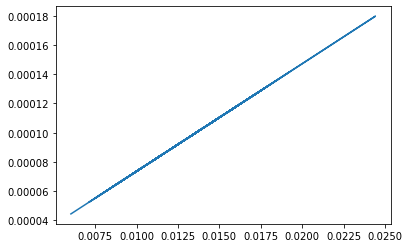

In [19]:
def LiqWaterContent(AH_n, AH_max, maxLWC=0.0002):
    # Liquid Water Content
    # Cloud liquid water content is proportional to absolute atmospheric humidity. 
    # maxLWC = 0.0002 #usually observed maximum AH [kg/m3]
    LWC = (AH_n/AH_max)* maxLWC
    #LWC = 0.0002
    # Output Units = kg/m3
    return LWC 

LWC = LiqWaterContent(AH, AH_max=0.02717, maxLWC=0.0002)
plt.plot(AH, LWC)

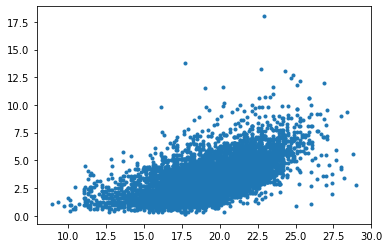

In [68]:
def Dewpoint(E):
    #Function to calculate Dewpoint Temperature (Td) [C]
    # Inputs: 
    #       - E = Vapour Pressure [mb]
    # Outpouts:
    #       - Td = Dew Point Temperature [C]
    btemp = (26.66082 - np.log(E))
    Td    = ((btemp-np.sqrt((btemp**2)-223.1986))/0.0182758048)-273.15
    
    # Output Units = Degrees Celsius
    return Td

Td = Dewpoint(E)
#plt.plot(Tmp, Td)
plt.plot(Tmp, Tmp-Td, '.')

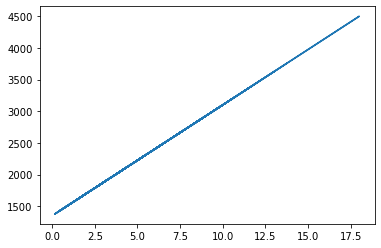

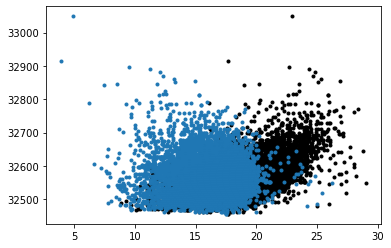

In [70]:
def LiftingCondensationLevel_simple(Tmp, Td, MSLP):
    # Function to calculate Lifting Condensation Level (LCL) [m]
    # Inputs: 
    #      - Tmp = Ground Temperature [C]
    #      - Td  = Dew point temperature [C]
    # Outputs: 
    #      - LCL = Lifting Condensation level [masl]
    #      - fog = Presence of fog (0 or 1) [-]
    #LCL_mb = (1/(((Tmp-Td)/223.15)+1)**3.5)*MSLP
    #LCL_masl   = max((44.3308-4.94654*((LCL_mb*100)**0.190263))*1000, 0)
    LCL_coban = 175 * (Tmp - Td)
    LCL_masl = LCL_coban + 1350
    return LCL_masl 

def LiftingCondensationLevel(Tmp, Td, MSLP):
    # Function to calculate Lifting Condensation Level (LCL) [m]
    # Inputs: 
    #      - Tmp = Ground Temperature [C]
    #      - Td  = Dew point temperature [C]
    # Outputs: 
    #      - LCL = Lifting Condensation level [masl]
    #      - fog = Presence of fog (0 or 1) [-]
    LCL_mb = (1/(((Tmp-Td)/223.15)+1)**3.5)*MSLP
    LCL_masl   = max((44.3308-4.94654*((LCL_mb*100)**0.190263))*1000, 0)
    #LCL_coban = 175 * (Tmp - Td)
    #LCL_masl = LCL_coban + 1350
    return LCL_masl 

LCL_masl_simple = np.zeros(len(Td))
LCL_masl = np.zeros(len(Td))

for i in range(len(Td)):
    LCL_masl_simple[i] = LiftingCondensationLevel_simple(Tmp[i], Td[i], 1)
    LCL_masl[i] = LiftingCondensationLevel(Tmp[i], Td[i], 1)

plt.figure()
#plt.plot(Tmp, LCL_masl_simple, 'k')
#plt.plot(Td, LCL_masl_simple)
plt.plot(Tmp-Td, LCL_masl_simple)
plt.figure()
plt.plot(Tmp, LCL_masl, '.k')
plt.plot(Td, LCL_masl, '.')

#### Stats and Visualization
###### Inputs: 
- Make a wind rose --> https://gist.github.com/phobson/41b41bdd157a2bcf6e14

##### Outputs: 
- Time series of total Fog interception
- Average Fog Interception per grid cell
- Average Fog interception per month
- Average Fog Interception

In [ ]:
#Scenario No Land Use Change, assume constant conditions based on 2016 Land use distribution
    #Fog_Evap_Budg_Scn1
#Scenario Total Deforestation
    #Fog_Evap_Budg_Scn2
#Scenario Total Reforestation
    #Fog_Evap_Budg_Scn3
#Scenario gradual change from 1991 condition to 2016 condition
    #Fog_Evap_Budg_Scn4

#sum per grid cell range
#tots_per_grid_cell_S1 = np.zeros((LUclass_len, 3))
tots_per_grid_cell_S2 = np.zeros((LUclass_len, 3))
tots_per_grid_cell_S3 = np.zeros((LUclass_len, 3))
tots_per_grid_cell_S4 = np.zeros((LUclass_len, 3))
for k in range(LUclass_len):
    for j in range(3):
        nans = np.count_nonzero(np.isnan(Fog_Evap_Budg_Scn2[k, :, j]))
        #tots_per_grid_cell_S1[k,j] = np.nansum(Fog_Evap_Budg_Scn1[k, :, j])/(ts_len - nans)
        tots_per_grid_cell_S2[k,j] = np.nansum(Fog_Evap_Budg_Scn2[k, :, j])/(ts_len - nans)
        #tots_per_grid_cell_S3[k,j] = np.nansum(Fog_Evap_Budg_Scn3[k, :, j])/(ts_len - nans)
        #tots_per_grid_cell_S4[k,j] = np.nansum(Fog_Evap_Budg_Scn4[k, :, j])/(ts_len - nans)

Aspect_names = ['North', 'West', 'South', 'East']



In [ ]:
df_tots_per_grid_cell = pd.DataFrame(tots_per_grid_cell_S1)

#df_tots_per_grid_cell_S4 = pd.DataFrame(tots_per_grid_cell_S4)
print(df_tots_per_grid_cell)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 18))
axs[0,0].plot(Slope, tots_per_grid_cell_S1[:,0], '.', label = 'Deforested')
axs[0,0].plot(Slope, tots_per_grid_cell_S2[:,0], '.', label = '0.5 Forested')
# axs[0,0].plot(Slope, tots_per_grid_cell_S3[:,0], '.', label = '0.25 Forested')
# axs[0,0].plot(Slope, tots_per_grid_cell_S4[:,0], '.', label = '0.75 Forested')
# axs[0,0].legend(title = 'Land Use Scenario')#, loc = 2)

axs[0,1].plot(Aspect, tots_per_grid_cell_S1[:,0], '.')
axs[0,1].plot(Aspect, tots_per_grid_cell_S2[:,0], '.')
# axs[0,1].plot(Aspect, tots_per_grid_cell_S3[:,0], '.')
# axs[0,1].plot(Aspect, tots_per_grid_cell_S4[:,0], '.')

axs[1,0].plot(TreeFrac_Scn1, tots_per_grid_cell_S1[:,0], '.')
axs[1,0].plot(TreeFrac_Scn2, tots_per_grid_cell_S2[:,0], '.')
# axs[1,0].plot(TreeFrac_Scn3, tots_per_grid_cell_S3[:,0], '.')
# axs[1,0].plot(TreeFrac_Scn4, tots_per_grid_cell_S4[:,0], '.')

axs[1,1].plot(Elev, tots_per_grid_cell_S1[:,0], '.', label = 'Deforested')
axs[1,1].plot(Elev, tots_per_grid_cell_S2[:,0], '.')
#axs[1,1].plot(Elev, tots_per_grid_cell_S3[:,0], '.')
#axs[1,1].plot(Elev, tots_per_grid_cell_S4[:,0], '.', label = 'dLULC')
axs[1,1].legend(title = 'Land Use Scenario')#, loc = 2)

In [ ]:
#sum per month
#tots_per_day_S1 = np.zeros((ts_len, 3))
tots_per_day_S2 = np.zeros((ts_len, 3))
tots_per_day_S3 = np.zeros((ts_len, 3))
tots_per_day_S4 = np.zeros((ts_len, 3))
for i in range(ts_len):
    for j in range(3):
        #tots_per_day_S1[i,j] = np.nansum(Fog_Evap_Budg_Scn1[:, i, j])/LUclass_len
        tots_per_day_S2[i,j] = np.nansum(Fog_Evap_Budg_Scn2[:, i, j])/LUclass_len
        #tots_per_day_S3[i,j] = np.nansum(Fog_Evap_Budg_Scn3[:, i, j])/LUclass_len
        #tots_per_day_S4[i,j] = np.nansum(Fog_Evap_Budg_Scn4[:, i, j])/LUclass_len

fig, axs = plt.subplots(2, 2, figsize=(12, 18))
axs[0,0].plot(tots_per_day_S1[:,0], '.', label = 'No dLULC')
axs[0,0].plot(tots_per_day_S2[:,0], '.', label = 'Deforested')
#axs[0,0].plot(tots_per_day_S3[:,0], '.', label = 'Reforested')
#axs[0,0].plot(tots_per_day_S4[:,0], '.', label = 'dLULC')
axs[0,0].legend(title = 'Land Use Scenario')#, loc = 2)

axs[0,1].plot(Year, tots_per_day_S1[:,0], '.')
axs[0,1].plot(Year, tots_per_day_S2[:,0], '.')
#axs[0,1].plot(Year, tots_per_day_S3[:,0], '.')
#axs[0,1].plot(Year, tots_per_day_S4[:,0], '.')

axs[1,0].plot(Month, tots_per_day_S1[:,0], '.')
axs[1,0].plot(Month, tots_per_day_S2[:,0], '.')
#axs[1,0].plot(Month, tots_per_day_S3[:,0], '.')
#axs[1,0].plot(Month, tots_per_day_S4[:,0], '.')

axs[1,1].plot(Month, (tots_per_day_S1[:,0]) / (Prcp) *100, '.')
axs[1,1].plot(Month, (tots_per_day_S2[:,0]) / (Prcp) *100, '.')
#axs[1,1].plot(Month, (tots_per_day_S3[:,0]) / (Prcp) *100, '.')
#axs[1,1].plot(Month, (tots_per_day_S4[:,0]) / (Prcp) *100, '.')



#axs[1,1].plot(Elev, tots_per_grid_cell[:,0], '.')

#print(tots_per_grid_cell)
    
#Daily_deposition

#plt.plot(Fog_Evap_Budg[:, :, 0])

#Aspect_labels = ['North', 'West', 'South', 'East']

In [ ]:
month_totals = np.zeros(13)
for i in range(1, 13):
    for j in range(len(tots_per_day_S1)):
        if (Month[j] == i):
            month_totals[i] = month_totals[i] + tots_per_day_S1[j, 0]
    

In [ ]:
plt.plot(month_totals/(2021-1990)/30, '.')
plt.xlim(0.5, 12.5)
plt.ylim(0.2, 0.7)
plt.xlabel('Month')
plt.ylabel('Average Daily Fog input (mm)')

In [ ]:
P = [3.865151515, 3.359120172, 3.502766798, 3.816871166, 5.937993921, 8.724368049, 6.996453202, 7.652600589, 9.608814271, 9.454081633, 7.802222222, 3.854643206]
plt.plot(np.linspace(1, 13, 12), (month_totals[1:13]/(2021-1990)/30)/P * 100, '.')
plt.xlabel('Month')
plt.ylabel('Fog input as % of Rain input')

In [ ]:
plt.plot(np.linspace(1, 13, 12), P, '.')
plt.xlabel('Month')
plt.ylabel('Average Daily Precipitation [mm]')

In [ ]:
#Fog_Evap_Budg_Scn1[:, :, 0].tofile('Scenario1.csv', sep = ',') 
#Fog_Evap_Budg_Scn2.tofile('Scenario2.csv', sep = ',') 
#Fog_Evap_Budg_Scn3.tofile('Scenario3.csv', sep = ',') 
#Fog_Evap_Budg_Scn4.tofile('Scenario4.csv', sep = ',') 
tots_per_grid_cell_S3[:, 0].tofile('Scenario3_per_cell.csv', sep = ',')
tots_per_grid_cell_S4[:, 0].tofile('Scenario4_per_cell.csv', sep = ',')

In [ ]:
tots_per_day_S4[:,0].tofile('Scenario4_per_day.csv', sep = ',')

In [ ]:

 #   print('ForestFogInclinationAngle = ' + str(ForestFogInclinationAngle))
 #   print('PastureFogInclinationAngle = ' + str(PastureFogInclinationAngle))
 #   print('DeposProportion = '+ str(DeposProportion))
#     print('GrassImpactionFlux = ' + str(GrassImpactionFlux))
#     print('ForestTrappingSfcArea = '+ str(ForestTrappingSfcArea))
#     print(' ImpactionFrac = '+ str(ImpactionFrac))
#     print('FogIntmm = '+ str(FogIntmm))

Text(0, 0.5, 'Trees trapping Surface Area')

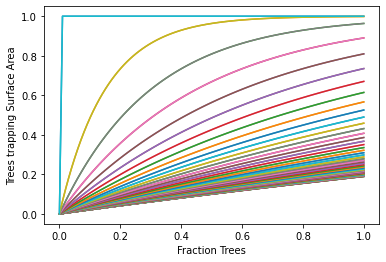

In [6]:
a = np.linspace(0, 1, 100)
c = np.linspace(-math.pi/2, math.pi/2, 100)
for i in range(len(c)):
    b = (1-np.exp((-0.7 * .3 * (a))/math.cos(c[i])))
    plt.plot(a, b)
plt.xlabel('Fraction Trees')
plt.ylabel('Trees trapping Surface Area')

Text(0, 0.5, 'Pasture trapping Surface Area')

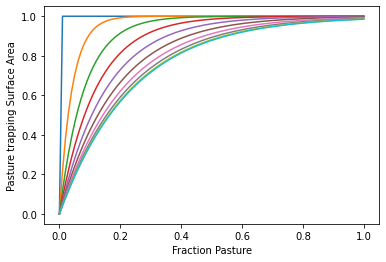

In [5]:
a = np.linspace(0, 1, 100)
c = np.linspace(-math.pi/2, 0, 10)
for i in range(len(c)):
    b = (1-np.exp((-0.7 * 6 * (a))/math.cos(c[i])))
    plt.plot(a, b)
plt.xlabel('Fraction Pasture')
plt.ylabel('Pasture trapping Surface Area')